# Qui êtes-vous ?
<div class="alert alert-block alert-info">
Écrire ci-dessous votre nom, prénom et numéro étudiant :
</div>

In [2]:
# MOCKUS Manuel 3772400

# TME 04 - LIME / SHAP

<div class="alert alert-block alert-warning">
L'objet de ce TME est de tester les algorithmes LIME et SHAP sur une tâche de classification assez simple.
</div>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1 - Préparation du dataset


<div class="alert alert-block alert-warning">
Nous allons utiliser le dataset <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">UCI ML Breast Cancer Wisconsin (Diagnostic)</a>.
</div>

<div class="alert alert-block alert-info">
    Tout d'abord, exécuter le bloc ci-dessous pour importer la bibliothèque <code>datasets</code> de <code>sklearn</code>.
</div>

In [4]:
from sklearn import datasets

<div class="alert alert-block alert-info">
Exécuter le bloc suivant pour charger les données.
 </div>

In [5]:
breast_cancer = datasets.load_breast_cancer()
a = 1

<div class = "alert alert-block alert-info">
    Q1.1 - Visualiser le contenu de la variable <code>breast_cancer</code>.
</div>

In [6]:
print(breast_cancer['data'])

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


<div class = "alert alert-block alert-info">
    Q1.2 - Définir les variables <code>X_train, X_test, y_train, y_test</code> avec <code>train_test_split</code> où vous utiliserez 25% des données pour le test.
</div>

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(breast_cancer['data'], breast_cancer['target'], train_size=0.75, random_state = 1234)

<div class = "alert alert-block alert-info">
    Q1.3 - Définir la variable <code>feature_names</code> contenant la liste des caractéristiques dans ce dataset ainsi que les noms de classes dans la variable <code>target_names</code>.
</div>

In [8]:
feature_names = breast_cancer['feature_names']
target_names = breast_cancer['target_names']
print(feature_names)
print(target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


## 2 - Apprentissage d'un modèle linéaire

<div class="alert alert-block alert-warning">
Nous allons apprendre la tâche de classification en utilisant un modèle de régression logistique.
</div>

<div class = "alert alert-block alert-info">
    Q2.1 - Apprendre un modèle <code>logreg</code> de régression logistique sur ces données.
</div>

In [9]:
from sklearn.linear_model import LogisticRegression

lrModel = LogisticRegression(class_weight= 'balanced', max_iter= 10000)
lrModel.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

<div class = "alert alert-block alert-info">
    Q2.2 - Dans <code>y_pred</code>, calculer les prédictions sur les données de test.
</div>

In [10]:
y_pred = lrModel.predict(X_test)

<div class = "alert alert-block alert-info">
    Q2.3 - Avec <code>confusion_matrix</code>, donner la matrice de confusion sur les données de test.
</div>

In [11]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, y_pred)
print(c_matrix)

[[50  5]
 [ 2 86]]


<div class = "alert alert-block alert-info">
    Q2.3 - Avec <code>f1_score</code>, calculer le score f1.
</div>

In [12]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='binary')

0.9608938547486033

<div class = "alert alert-block alert-info">
    Q2.4 - En utilisant les labels des caractéristiques du dataset, dessiner un diagramme en barre de l'importance de chaque caractéristique apprise par la régression logistique.
</div>

<AxesSubplot: >

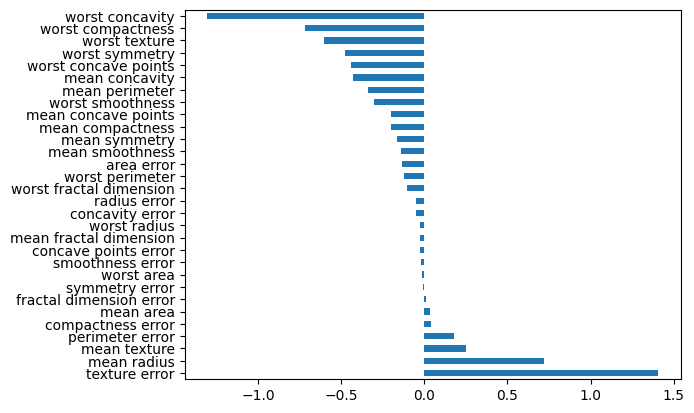

In [13]:
import pandas as pd
coefs = lrModel.coef_[0]
pd.Series(coefs, index=feature_names).nlargest(coefs.size).plot(kind='barh')

<div class = "alert alert-block alert-info">
    Q2.5 - De la même manière, donner les importances du premier exemple de la base de test.
</div>

<AxesSubplot: >

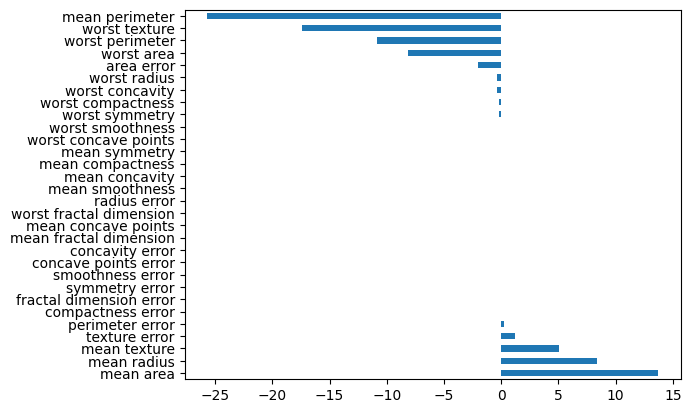

In [14]:
contribution = lrModel.coef_[0]*X_test[0]
pd.Series(contribution, index=feature_names).nlargest(coefs.size).plot(kind='barh')

## 3 - Explication avec LIME

<div class="alert alert-block alert-warning">
Nous allons étudier une explication donnée par LIME.
</div>

<div class = "alert alert-block alert-info">
    Q3.1 - Exécuter le bloc ci-dessous pour obtenir une explication sur le premier exemple de la base de test. Commentez.
</div>

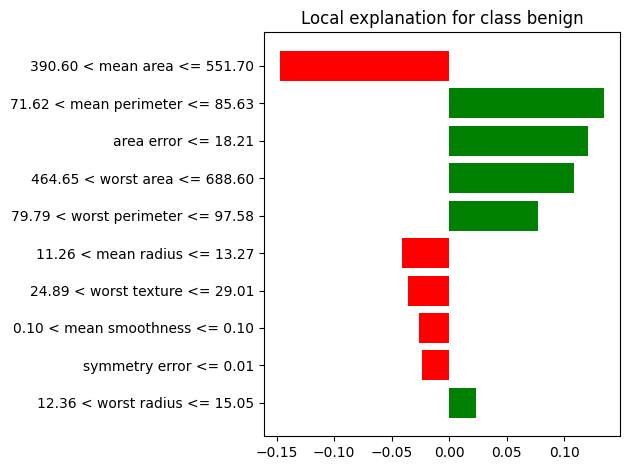

In [15]:
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(X_test,
    feature_names=feature_names,
    class_names=target_names,
    categorical_features=[],
    mode='classification')

exp = explainer.explain_instance(X_test[0], lrModel.predict_proba, num_features=10)

exp.as_pyplot_figure()
plt.tight_layout()

#### Commentaire : 
Dans ce cas on remarque que le plus grand contributeurs a la classification "benign" sont "worst area" pour des valeurs entre464 et 688 tant que "mean area" est un fort contributeur de la class contraire (malign) pour l'hyperplan entre 390 et 551.
En comparant avec le dernier exemple on remarque que des valeurs de "mean area" entre 551 et 761 sont des contributeurs pour la class Benign.

<div class = "alert alert-block alert-info">
    Q3.2 - Comparer avec l'exemple suivant de la base de test.
</div>

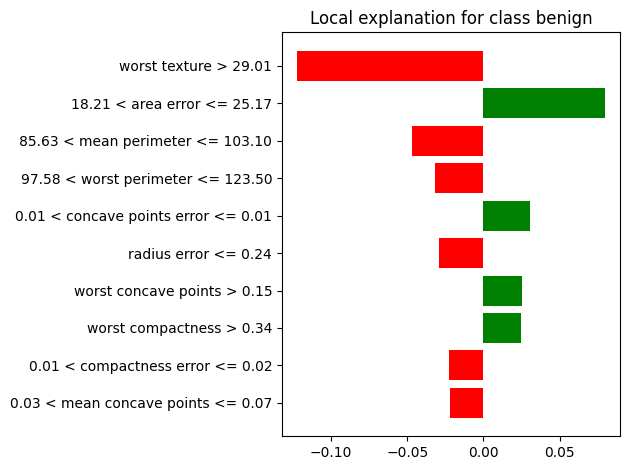

In [16]:
exp = explainer.explain_instance(X_test[-1], lrModel.predict_proba, num_features=10)

exp.as_pyplot_figure()
plt.tight_layout()

## 4 - Explication avec SHAP

<div class="alert alert-block alert-warning">
Nous allons étudier une explication donnée par SHAP.
</div>

<div class = "alert alert-block alert-info">
    Q4.1 - Exécuter le bloc ci-dessous pour obtenir les explications globales de SHAP. Commentez.
</div>

/home/manuel/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


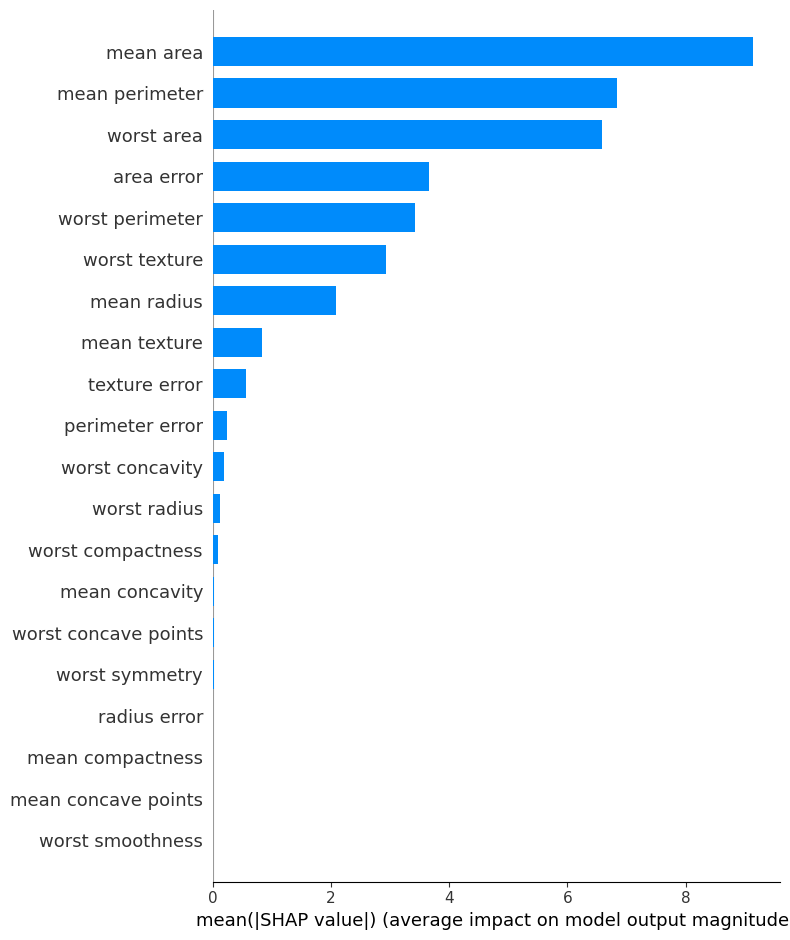

In [17]:
import shap

explainer = shap.LinearExplainer(lrModel, X_train)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=feature_names)

#### Commentaire :

mean area, worst perimeter and worst area ont les valeurs de shap les plus importantes, donc ils ont la contribution moyenne la plus importante a la clasification d'une carachteristique 

<div class = "alert alert-block alert-info">
    Q4.2 - Exécuter le bloc ci-dessous pour obtenir une explication locale avec SHAP du premier exemple de la base de test. Commentez.
</div>

In [18]:
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values[0, :],
    X_test[0, :],
    feature_names=feature_names,
)



# Commentaire:
Comme avec la methode Lime, on trouve les contributions les plus importantes pour benign 


<div class = "alert alert-block alert-info">
    Q4.3 - Comparer avec l'exemple suivant de la base de test.
</div>

In [19]:
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values[-1, :],
    X_test[-1, :],
    feature_names=feature_names,
)

## 5 - Données textuelles

<div class="alert alert-block alert-warning">
    Nous allons apprendre un modèle de classification random forest sur les données <code>fetch_20newsgroups</code> puis utiliser LIME et SHAP pour obtenir des explications sur la classification d'exemples.
</div>

<div class = "alert alert-block alert-info">
À l'aide de la <a href="https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py">documentation du dataset fetch_20newsgroups</a>,  apprendre un modèle random forest de classification bi-classe de texte.
</div>

In [20]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from time import time

categories = [
    "talk.religion.misc",
    "sci.space",
]


def size_mb(docs):
    return sum(len(s.encode("utf-8")) for s in docs) / 1e6


def load_dataset(verbose=False, remove=()):
    """Load and vectorize the 20 newsgroups dataset."""

    data_train = fetch_20newsgroups(
        subset="train",
        categories=categories,
        shuffle=True,
        random_state=42,
        remove=remove,
    )

    data_test = fetch_20newsgroups(
        subset="test",
        categories=categories,
        shuffle=True,
        random_state=42,
        remove=remove,
    )

    # order of labels in `target_names` can be different from `categories`
    target_names = data_train.target_names

    # split target in a training set and a test set
    y_train, y_test = data_train.target, data_test.target

    # Extracting features from the training data using a sparse vectorizer
    t0 = time()
    vectorizer = TfidfVectorizer(
        sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english"
    )
    X_train = vectorizer.fit_transform(data_train.data)
    duration_train = time() - t0

    # Extracting features from the test data using the same vectorizer
    t0 = time()
    X_test = vectorizer.transform(data_test.data)
    duration_test = time() - t0

    feature_names = vectorizer.get_feature_names_out()

    if verbose:

        # compute size of loaded data
        data_train_size_mb = size_mb(data_train.data)
        data_test_size_mb = size_mb(data_test.data)

        print(
            f"{len(data_train.data)} documents - "
            f"{data_train_size_mb:.2f}MB (training set)"
        )
        print(f"{len(data_test.data)} documents - {data_test_size_mb:.2f}MB (test set)")
        print(f"{len(target_names)} categories")
        print(
            f"vectorize training done in {duration_train:.3f}s "
            f"at {data_train_size_mb / duration_train:.3f}MB/s"
        )
        print(f"n_samples: {X_train.shape[0]}, n_features: {X_train.shape[1]}")
        print(
            f"vectorize testing done in {duration_test:.3f}s "
            f"at {data_test_size_mb / duration_test:.3f}MB/s"
        )
        print(f"n_samples: {X_test.shape[0]}, n_features: {X_test.shape[1]}")

    return X_train, X_test, y_train, y_test, feature_names, target_names

In [21]:
X_train2, X_test2, y_train2, y_test2, feature_names2, target_names2 = load_dataset(verbose = True)

970 documents - 2.03MB (training set)
645 documents - 1.32MB (test set)
2 categories
vectorize training done in 0.265s at 7.658MB/s
n_samples: 970, n_features: 4990
vectorize testing done in 0.171s at 7.707MB/s
n_samples: 645, n_features: 4990


In [22]:
from sklearn.ensemble import RandomForestClassifier

lrModel2 = RandomForestClassifier(criterion= 'gini')
lrModel2.fit(X_train2, y_train2)

RandomForestClassifier()

In [23]:
y_pred2 = lrModel2.predict(X_test2)

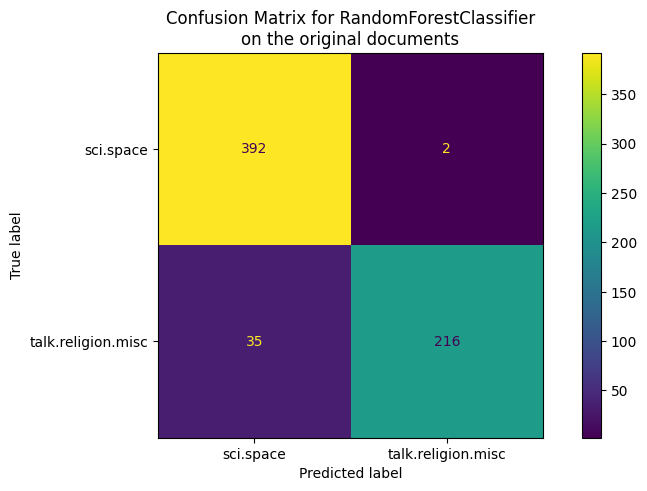

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test2, y_pred2, ax=ax)
ax.xaxis.set_ticklabels(target_names2)
ax.yaxis.set_ticklabels(target_names2)
_ = ax.set_title(
    f"Confusion Matrix for {lrModel2.__class__.__name__}\non the original documents"
)

<div class = "alert alert-block alert-info">
Utilisez LIME et SHAP pour obtenir des explications sur les prédictions obtenues sur des exemples.
    </div>

### LIME

<AxesSubplot: >

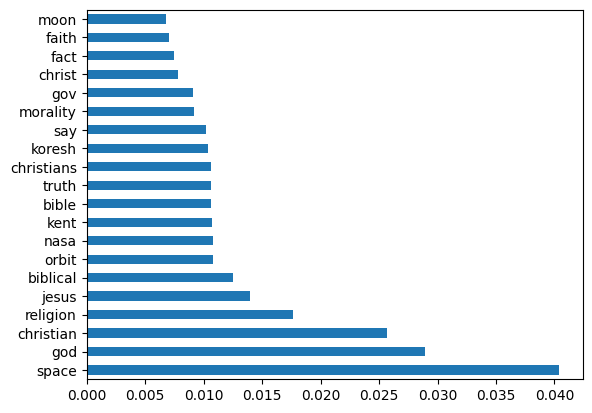

In [25]:
import pandas as pd
coefs2 = lrModel2.feature_importances_
pd.Series(coefs2, index=feature_names2).nlargest(20).plot(kind='barh')

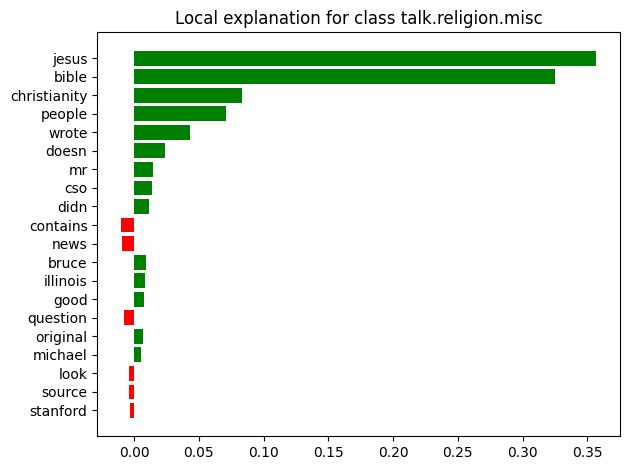

In [26]:

from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(X_test2,
    feature_names=feature_names2,
    class_names=target_names2,
    categorical_features=[],
    mode='classification')

exp = explainer.explain_instance(X_test2[2], lrModel2.predict_proba, num_features=20)
exp.as_pyplot_figure()
plt.tight_layout()

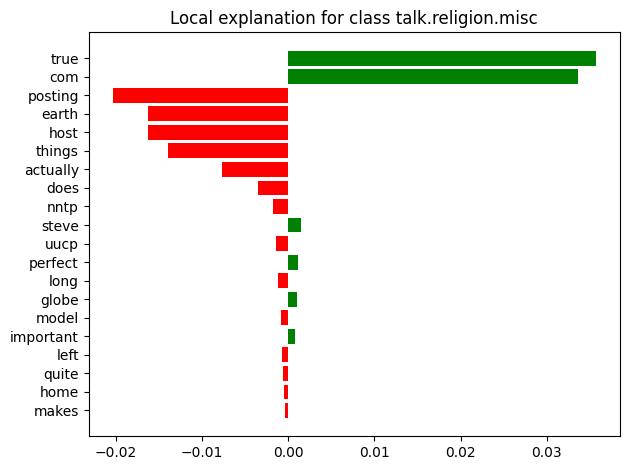

In [27]:
exp = explainer.explain_instance(X_test2[1], lrModel2.predict_proba, num_features=20)
exp.as_pyplot_figure()
plt.tight_layout()

#### Comment:
We can see that text classification between religion and science articles is quite interesting. Even if the highest weights are attributed to vectorized words clearly aluding to religion or science (god, christian, space, nasa... etc). Looking at the Lime explainer we remark that the local importance for a given exemple of the religion class is clearly marked by jesus, christianity and bible, where as 

### SHAP

In [30]:

explainer = shap.TreeExplainer(lrModel2, X_train2)
shap_values = explainer.shap_values(X_test2)

shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=feature_names)

Found a NULL input array in _cext_dense_tree_update_weights!


ValueError: setting an array element with a sequence.

## 5 - Implémentation de LIME

<div class="alert alert-block alert-info">
    Sur des données textuelles, implémentez une version rudimentaire de LIME en utilisant la fonction de proximité proposée dans le cours. Retrouvez-vous les mêmes feature importance qu'avec la bibliothèque LIME ?
</div>

In [ ]:
explainer = LimeTabularExplainer(X_test2,
    feature_names=feature_names2,
    class_names=target_names2,
    categorical_features=[],
    mode='classification')

def LIME(data, )